# Ermias Mikael

## DATA 601 - Project 2 Data Exploration and Cleaning 
##### May 15, 2023

# Source Data
The original dataset and full detail of the description can be found at https://www.kaggle.com/datasets/rajugc/kaggle-dataset

## Why I picked this dataset
As we were asked to pick a dataset to work with for this project the first task was:
1. First find a good or interesting topic or subject worth for exploring. (which the prof. was going to approve of)
2. Second find a valid dataset for that subject - (we are going to look what I mean by 'valid' dataset)

The aim of this project is:
1. To show the technical proficiency in manipulating a dataset, which includes cleaning, restructuring, and make it fit for good analysis.
2. Discovering patterns and drawing insight from the data and make conclusions, and presenting the conclusions.

Challenges encountered:
1. Deciding on the topic/subject of the dataset that I would be familiar or comfortable with.
2. Finding a good/valid dataset for this project.

Therefore, I stumbled upon this dataset, which is a dataset about 'good/high scoring' datasets found in Kaggle. I thought this dataset would help one narrow down the search for a dataset and help speed up to find good one. 

## Description of the features in the dataset
A fuller explanation of the dataset features as the author intended could be found in the same link.
Few of the interesting features I found include:
1. Features such as the type_of_file, no_of_file, and size present a good filtering mechanism based on those features as well as these contain both numeric and string data type columns
2. Features such as upvotes, usability, and medals are also good for filtering high rated datasets and they are all numerical features making them good for statistical calculations
3. Finally, date feature helps to filter more current datasets (as well as being a 'date' datatype), and the dataset link feature is also included, which helps one click and take a look at the actual dataset.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

## Generic Functions

In [2]:
# Function for stripping whitespaces from dataframe columns
def strip_whitespace(x):
    if isinstance(x, str):
        return x.strip()
    else:
        return x

## Default Jupyter Notebook Settings

In [3]:
# Remove limits for data column display
pd.set_option('display.max_colwidth', None)

# Set the maximum number of rows to display
pd.set_option('display.max_rows', None)

# Sets PD to displays float numbers as 4 decimal places.
pd.options.display.float_format = "{:.4f}".format

## Data Loading Exploration (10 points)

As part of the data cleaning you will need to explore the data. As a minimum you will need to calculate the number of rows, number of columns, and information of the dataframe. At minimum you need to use the .info(), .hist() and sns.pairplot() functions. At any point after making changes during the data cleaning you may use the .info() or any other functions.

Document any observations regarding any potential data cleaning. Also discuss datatypes given the col description and if it each column datatype makes sense and make changes as appropriate. Identify any potential outliers, and any correlation between features. Identify plots that may be worth exploring during the EDA. 

In [4]:
# LOADING CSV FILE
# Na_values may need to be reviewed as some datasets may include an accronym.
# For example, 'NA' may be an abbreviation for 'North America'.
# Also date parising some potential date columns
df_data = pd.read_csv('./input_data/kaggle-preprocessed.csv',
                      #encoding = "utf-8-sig",
                      parse_dates=['Date', 'Day', 'Time'],
                      keep_default_na=False,
                      na_values=['', '-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A','N/A', '#NA', 'NULL', 'NaN', '-NaN', 'nan', '-nan']) 

# Encoding "cp1252" or "utf-8-sig" used so that Excel does not create special characters. Standard Python is utf-8.
# See reference for explanation https://stackoverflow.com/questions/57061645/why-is-%C3%82-printed-in-front-of-%C2%B1-when-code-is-run

In [5]:
# Verifying number of columns, rows, datatypes, and other info such as nulls on the dataframe
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9158 entries, 0 to 9157
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    9158 non-null   int64         
 1   Dataset_name  9158 non-null   object        
 2   Author_name   9158 non-null   object        
 3   Author_id     9158 non-null   object        
 4   No_of_files   9158 non-null   int64         
 5   size          9158 non-null   object        
 6   Type_of_file  9156 non-null   object        
 7   Upvotes       9158 non-null   int64         
 8   Medals        9158 non-null   object        
 9   Usability     9158 non-null   float64       
 10  Date          9158 non-null   datetime64[ns]
 11  Day           9158 non-null   object        
 12  Time          9158 non-null   datetime64[ns]
 13  Dataset_link  9158 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(8)
memory usage: 1001.8+ KB


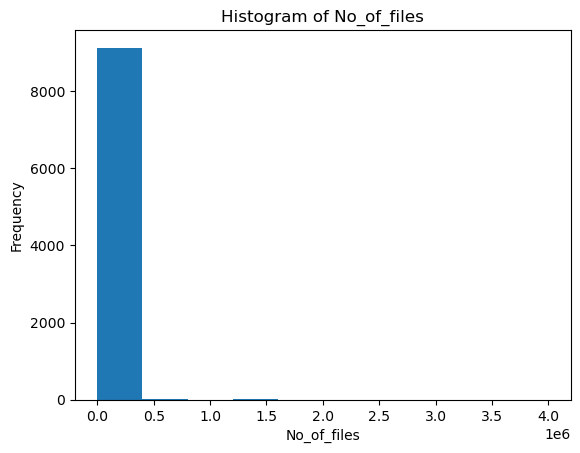

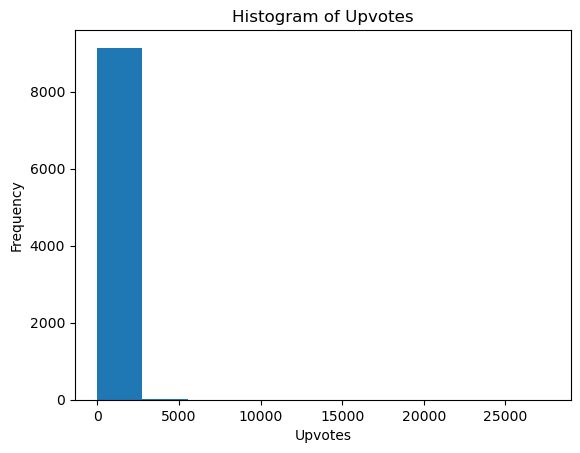

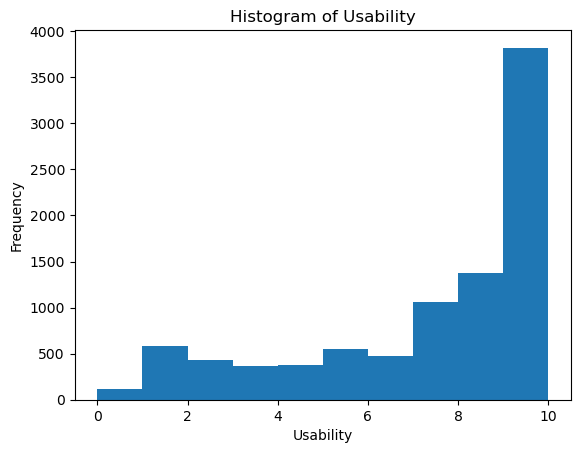

In [6]:
# plotting histogramd of all numeric columns
cols_to_plot = ['No_of_files', 'Upvotes', 'Usability']
for c in cols_to_plot:
    plt.hist(df_data[c])
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {c}')
    plt.show()

# Observation:

# 1. The number of files below 1 have very high frequency(which does not make sense, i.e. how can you have
# a dataset without a file for it?)
# 2. We can also see that the majority of the datasets received below five thousand upvotes. 
# 3. Out of the three the usability histogram shows frequency levels for each usability scores.

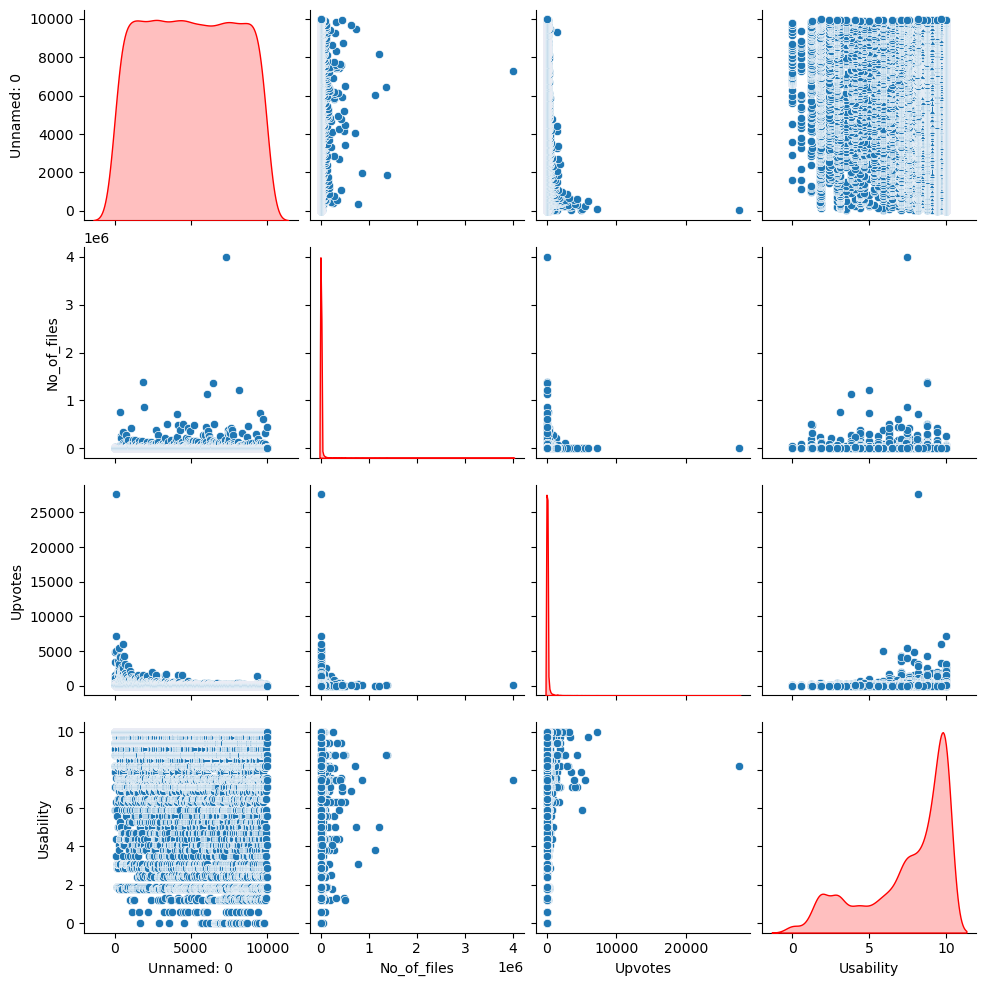

In [7]:
# Running pairplot to see if something stands out visually
sns.pairplot(df_data, diag_kind = 'kde', diag_kws={'color':'red'}, dropna = True)
plt.show()

# Observation
# The 'unnamed' column is not useful, the plots relating to that column don't show clear clusters of data gatherd
# in one pattern. Only the top left corner plot shows the unnamed rises sharply at the start, stays up all the way,
# and goes sharply down. But this is an index column imported from the csv, and doesn't make sense to have it.


## Data cleaning (20 points)

Develop understanding of the data by exploring data issues. At minimum perform the following tasks:
- Are there any full row duplicates and should we remove/drop?
- Evaluate duplicates in other columns that may need to be modified? 
- Evaluate null values? Does it makes sense to have null values? Do we need to fix these null values using the column mean, column min, column max, group mean, etc. or should we drop the null values?
- Evaluate for potential of outliers?

Document any observations, and conclusions. Save the cleaned dataset in the output_data folder.


In [8]:
# Using the .head to preview if we have normal looking rows
df_data.head(3)

,Unnamed: 0,Dataset_name,Author_name,Author_id,No_of_files,size,Type_of_file,Upvotes,Medals,Usability,Date,Day,Time,Dataset_link
0,0,Hotel Reservations Dataset,Ahsan Raza,https://www.kaggle.com/ahsan81,1,491 kB,CSV,315,Silver,10.0000,2023-01-04,Wed,2023-05-15 18:20:31,https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset
1,2,Most Subscribed 1000 Youtube Channels,Mrityunjay Pathak,https://www.kaggle.com/themrityunjaypathak,1,29 kB,CSV,76,Bronze,10.0000,2023-01-21,Sat,2023-05-15 20:12:05,https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-youtube-channels
2,3,Olympics 124 years Dataset(till 2020),Nitish Sharma01,https://www.kaggle.com/nitishsharma01,3,5 MB,CSV,30,Bronze,10.0000,2023-02-01,Wed,2023-05-15 14:30:49,https://www.kaggle.com/datasets/nitishsharma01/olympics-124-years-datasettill-2020


In [9]:
# Dataframe shows 'Unnamed' column because of how read_csv is reading the first column
# (excel row numbers) as the first column. Dropping this column now for a bit of 
# cleaning.
df_data = df_data.loc[:, ~df_data.columns.str.match('Unnamed')]

# Checking the dataframe info again:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9158 entries, 0 to 9157
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Dataset_name  9158 non-null   object        
 1   Author_name   9158 non-null   object        
 2   Author_id     9158 non-null   object        
 3   No_of_files   9158 non-null   int64         
 4   size          9158 non-null   object        
 5   Type_of_file  9156 non-null   object        
 6   Upvotes       9158 non-null   int64         
 7   Medals        9158 non-null   object        
 8   Usability     9158 non-null   float64       
 9   Date          9158 non-null   datetime64[ns]
 10  Day           9158 non-null   object        
 11  Time          9158 non-null   datetime64[ns]
 12  Dataset_link  9158 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(8)
memory usage: 930.2+ KB


In [10]:
# Performing checks of potential leading/trailing whitespace on all columns
# and applying the strip function to each column
stripped_df = df_data.applymap(strip_whitespace)

In [11]:
# compare the original and stripped DataFrames
print(df_data.eq(stripped_df).all())
# Appears Dataset_name and Type_or_file had white spaces.

# Saving whitespace stripped dataframe
df_data = stripped_df
df_data.info()
# We now have twelve columns with usable values and whitespace stripped.

Dataset_name    False
Author_name      True
Author_id        True
No_of_files      True
size             True
Type_of_file    False
Upvotes          True
Medals           True
Usability        True
Date             True
Day              True
Time             True
Dataset_link     True
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9158 entries, 0 to 9157
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Dataset_name  9158 non-null   object        
 1   Author_name   9158 non-null   object        
 2   Author_id     9158 non-null   object        
 3   No_of_files   9158 non-null   int64         
 4   size          9158 non-null   object        
 5   Type_of_file  9156 non-null   object        
 6   Upvotes       9158 non-null   int64         
 7   Medals        9158 non-null   object        
 8   Usability     9158 non-null   float64       
 9   Date          9158 non-null   datetime64

In [12]:
# Having stripped whitespaces, removed unecessary columns we can now check for duplicates

# checking for row duplicates
duplicates = df_data[df_data.duplicated()]

duplicates.head()

print(f'There are {duplicates.shape[0]} records were all features are duplicate.')

# Observation:
# 1. I've tried with duplicates and duplicates.head() and for some reason output is 
#    showing only one row output of the duplicated instead of showing each of the duplicates
#    count with their index number

# Using alternative method to show all the rows of the dupes
# show all rows where Dataset_name equals 'Adidas vs Nike'
adidas_rows = df_data.loc[df_data['Dataset_name'] == 'Adidas vs Nike']

# print the result
adidas_rows

# result shows index 2471 & 2472 are the same


There are 1 records were all features are duplicate.


,Dataset_name,Author_name,Author_id,No_of_files,size,Type_of_file,Upvotes,Medals,Usability,Date,Day,Time,Dataset_link
2471,Adidas vs Nike,Kash,https://www.kaggle.com/kaushiksuresh147,1,284 kB,CSV,58,Bronze,10.0000,2020-10-17,Sat,2023-05-15 18:13:36,https://www.kaggle.com/datasets/kaushiksuresh147/adidas-vs-nike
2472,Adidas vs Nike,Kash,https://www.kaggle.com/kaushiksuresh147,1,284 kB,CSV,58,Bronze,10.0000,2020-10-17,Sat,2023-05-15 18:13:36,https://www.kaggle.com/datasets/kaushiksuresh147/adidas-vs-nike


In [13]:
# Now we have exactly two rows for 'Adidas vs Nike' dataset, we can delete one and reset
# the index of the rows

print('Original df_data row count', df_data.shape[0])

# drop row with index 2471 and reset index
df_data = df_data.drop(index = 2471).reset_index(drop=True)


print('After dropping duplicates df_data row count', df_data.shape[0])

Original df_data row count 9158
After dropping duplicates df_data row count 9157


In [14]:
# Evaluating duplicates in columns that may need to be modified.

# NOTE:
# Each of columns in this dataset make sense for them to have duplicates. For example, author_id could have 
# multiple entries because an author can upload multiple datasets, and similarly also for the other columns, 
# except perhaps the dataset_link column. Because the link could not be duplicates because, web link as the 
# nature of URL's dictates that each has to be unique. So, for the purposes of this exercise to demo checking 
# duplicates in columns I've picked the dataset_name column only. 

# Using value_counts() to check duplicates on dataset name
df_data['Dataset_name'].value_counts()
# Data shows multiple entries for the same dataset name which makes it suspicious that
# these entries are dupes. They could be entered by different authors under different link but still 
# be the same datasets (having the same data)

# Notice that the dataset_name length shows 8959

Heart Disease                                         9
heart-disease                                         5
Bank Marketing                                        5
Heart Disease Dataset                                 4
Titanic                                               4
Heart Disease Prediction                              4
Social Network Ads                                    4
Bank_Personal_Loan_Modelling                          3
Resume Dataset                                        3
Online Retail Dataset                                 3
Air Passengers                                        3
Students Performance in Exams                         3
Credit Card Fraud Detection                           3
Housing Prices Dataset                                3
Customer_Data                                         3
Diabetes                                              3
Udemy Courses                                         3
Customer Churn                                  

In [15]:
# I wanted to create a sub dataframe of those duplicates in the dataset_name column
df_duplicates = df_data[df_data.duplicated('Dataset_name')]
df_duplicates.shape

# Data shows that there are 198 datasets that are duplicate entries (they can be two or more times duplicated)

(198, 13)

In [16]:
# lets for example pick one of the duplicate dataset_name entries and look at the actual data in all the features.
df_data[df_data['Dataset_name'] == 'Heart Disease']

# Observation

# Originally at face value these data seemed not duplicates because the values in each feature are all diferent.
# However, I went further and checked the dataset_link and opened some to see if the datasets are actually different.

# After investigating a number of dataset_link samples randomly I found that the datasets were infact with the same 
# features and data, including file sizes, file_types, etc., were all the same. So these are actually duplicates.

,Dataset_name,Author_name,Author_id,No_of_files,size,Type_of_file,Upvotes,Medals,Usability,Date,Day,Time,Dataset_link
3465,Heart Disease,Rasel Ahmed,https://www.kaggle.com/data855,1,3 kB,CSV,27,Bronze,7.6000,2020-09-08,Tue,2023-05-15 11:34:56,https://www.kaggle.com/datasets/data855/heart-disease
5517,Heart Disease,Parnian Malekian,https://www.kaggle.com/parnianmalekian,1,3 kB,CSV,27,Silver,4.1000,2022-09-26,Mon,2023-05-15 22:18:46,https://www.kaggle.com/datasets/parnianmalekian/heart-disease
7481,Heart Disease,Meet Nagadia,https://www.kaggle.com/meetnagadia,1,5 kB,other,23,Bronze,10.0000,2022-03-07,Mon,2023-05-15 10:44:00,https://www.kaggle.com/datasets/meetnagadia/heart-disease
7698,Heart Disease,Mountaga,https://www.kaggle.com/mountaga,1,3 kB,CSV,2,No Medal,2.9000,2020-12-11,Fri,2023-05-15 01:53:49,https://www.kaggle.com/datasets/mountaga/heart-disease
8215,Heart Disease,Rashi Gupta,https://www.kaggle.com/rashigupta29,1,4 kB,CSV,1,No Medal,2.9000,2020-10-31,Sat,2023-05-15 16:15:36,https://www.kaggle.com/datasets/rashigupta29/heart-disease
8220,Heart Disease,chinmax,https://www.kaggle.com/chinmax,1,3 kB,CSV,1,No Medal,2.9000,2021-01-05,Tue,2023-05-15 13:02:02,https://www.kaggle.com/datasets/chinmax/heart-disease
8221,Heart Disease,Julian Melero,https://www.kaggle.com/julianmelero,1,3 kB,CSV,1,No Medal,2.9000,2021-01-16,Sat,2023-05-15 02:46:02,https://www.kaggle.com/datasets/julianmelero/heart-disease
8223,Heart Disease,Pranav Sunil Khairnar,https://www.kaggle.com/pranavsunilkhairnar,1,3 kB,CSV,3,No Medal,2.9000,2021-09-07,Tue,2023-05-15 11:01:35,https://www.kaggle.com/datasets/pranavsunilkhairnar/heart-disease
8224,Heart Disease,Zhou Xing,https://www.kaggle.com/zhoumeixing,1,3 kB,CSV,1,No Medal,5.3000,2021-10-03,Sun,2023-05-15 19:16:38,https://www.kaggle.com/datasets/zhoumeixing/heart-disease-dataset


In [17]:
# Lets take a look at the print of all the dataset name column, just in case something stands out befor we
# remove the duplicates
df_data['Dataset_name']

# Observation:
# Scrolling down the column data I found that some of the column names contain non ascii characters. 
# So, I have to remove those characters white space stripping first before removing duplicates.

0                               Hotel Reservations Dataset
1                    Most Subscribed 1000 Youtube Channels
2                    Olympics 124 years Dataset(till 2020)
3                            Medical Student Mental Health
4                       Latest Netflix TV shows and movies
5             Predicting Credit Card Customer Segmentation
6            Most Watched Stocks of Past Decade(2013-2023)
7                                     Amazon Sales Dataset
8                  US Film Industry Top Movies & Directors
9        CEO vs Worker Pay in Top 3000 US Companies [2023]
10                            New Cars USA 2022/23 dataset
11               Salary Dataset - Simple linear regression
12                  Technology Company Layoffs (2022-2023)
13          Predict students' dropout and academic success
14                  FIFA World Cup 2022 Players Statistics
15                                               Car Price
16                                      Home Loan Approv

In [18]:
# Remove non ascii characters from 'dataset_name' column and apply strip white space again in case 
# these are refilled with white space
df_data['Dataset_name'] = df_data['Dataset_name'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

df_data = df_data.applymap(strip_whitespace)

# check the data again
df_data['Dataset_name']

# Observation
# non ascii characters are cleaned.

0                               Hotel Reservations Dataset
1                    Most Subscribed 1000 Youtube Channels
2                    Olympics 124 years Dataset(till 2020)
3                            Medical Student Mental Health
4                       Latest Netflix TV shows and movies
5             Predicting Credit Card Customer Segmentation
6            Most Watched Stocks of Past Decade(2013-2023)
7                                     Amazon Sales Dataset
8                  US Film Industry Top Movies & Directors
9        CEO vs Worker Pay in Top 3000 US Companies [2023]
10                            New Cars USA 2022/23 dataset
11               Salary Dataset - Simple linear regression
12                  Technology Company Layoffs (2022-2023)
13          Predict students' dropout and academic success
14                  FIFA World Cup 2022 Players Statistics
15                                               Car Price
16                                      Home Loan Approv

In [19]:
# Rerunning of creating a sub dataframe of those duplicates in the dataset_name column
# to see if there is any change in the number of duplicates
df_duplicates = df_data[df_data.duplicated('Dataset_name')]
df_duplicates.shape

# Originally we had seen above there were 198 entries for the duplicates, now they are 201. So, removing non ascii
# and stripping whitespace has exposed that there were three unique entries with duplicates

(201, 13)

In [20]:
# Now it is time to drop the rows with duplicates in the dataset name column.
# But the decision becomes which ones to drop? i.e. 
# by upload date maybe? Or by usability, upvotes, or medals? I consider that the earliest date uploaded means
# it represents the original dataset uploaded. But some or most of the later duplicately uploaded datasets have 
# received medals or higher scores for their usaility and or upvotes. Perhaps they were more cleaned up, made more 
# usable, and perhaps that's why some of them received more upvotes and better medals than the original upload. 
# So, for the purposes of this exercise, I've decided to pick the latest date of the dataset upload and remove the
# older ones.

# Lets view the heart disease entries sorted by date to see what was the latest upload date
df_data[df_data['Dataset_name'] == 'Heart Disease'].sort_values('Date').max()

# Shows that the earliest date was 09/26/2022

Dataset_name                                                        Heart Disease
Author_name                                                               chinmax
Author_id                                      https://www.kaggle.com/zhoumeixing
No_of_files                                                                     1
size                                                                         5 kB
Type_of_file                                                                other
Upvotes                                                                        27
Medals                                                                     Silver
Usability                                                                 10.0000
Date                                                          2022-09-26 00:00:00
Day                                                                           Tue
Time                                                          2023-05-15 22:18:46
Dataset_link    

In [21]:
# Now let's drop those extra/duplicate dataset names uploaded at later dates and keep those with the original date.

# Filter out and save rows with the minimum date for each duplicated name
df_data = df_data.loc[df_data.groupby('Dataset_name')['Date'].idxmax()]

# Reset back dataframe by index after drops
df_data = df_data.sort_index()

# Lets see how many rows got left
print('Dataframe now has', df_data.shape[0], ' rows')

Dataframe now has 8956  rows


In [22]:
# Lets rerun creating dataframe of the duplicates in the dataset name to see if there are any left
df_duplicates = df_data[df_data.duplicated('Dataset_name')]
df_duplicates.shape

# No more duplicates in the dataset name column

(0, 13)

In [23]:
# rerunning the dataset full column display to check if we can spot anything that needs cleaning
df_data['Dataset_name'].value_counts()

# Observation - column now shows is clean enough.

Hotel Reservations Dataset                            1
24dec_tfefficientnetv2m_upsample105e4true6            1
22dec_tfefficientnetv2s_upsample105e4true6            1
DRIVE 2004                                            1
Chennai Zomato Restaurants Data                       1
Human gut microbiome of the children with ASD         1
AOL User Session Collection 500K                      1
Smart Cities Index Datasets                           1
24dec_tfefficientnetv2s_upsample105e4true6dropout     1
World War 2 casualties by country                     1
Daily Silver Price Historical Data                    1
Coronavirus in Argentina                              1
Mobile phone rating                                   1
Predicting Breast Cancer - Logistic Regression        1
8jan_tfefficientnetv2s_4e4lr1024512affine             1
Pedestrian Dataset                                    1
23dec_inceptionv4_upsample5e4true6                    1
Precious metal prices in USD                    

In [24]:
# Evaluating nulls, does it make sense to keep them? 
# check for null values in columns
null_cols = df_data.isnull().any()

null_cols

# Result shows only Type_of_file column has nulls

Dataset_name    False
Author_name     False
Author_id       False
No_of_files     False
size            False
Type_of_file     True
Upvotes         False
Medals          False
Usability       False
Date            False
Day             False
Time            False
Dataset_link    False
dtype: bool

In [25]:
# Let's see how many and which rows they are nulls for the type_of_file column
df_data[df_data['Type_of_file'].isnull()]

# Observation.
# 1. Result shows only two rows in the entire dataset where a column has null value.
#    Decided to ignore the need for modification and keep these two rows as is because
#    the number of files in a dataset has secondary importance compared to other features
#    such as usability, medals, etc.

,Dataset_name,Author_name,Author_id,No_of_files,size,Type_of_file,Upvotes,Medals,Usability,Date,Day,Time,Dataset_link
5405,UpdatedResumeDataSet,Amita Dhainje,https://www.kaggle.com/dhainjeamita,0,392 kB,NaN,19,No Medal,0.6000,2019-02-11,Mon,2023-05-15 23:42:08,https://www.kaggle.com/datasets/dhainjeamita/updatedresumedataset
6847,Tashkeela: Arabic diacritization corpus,Taha Zerrouki,https://www.kaggle.com/linuxscout,0,128 MB,NaN,23,Bronze,6.9000,2017-12-23,Sat,2023-05-15 21:37:51,https://www.kaggle.com/datasets/linuxscout/tashkeela


In [26]:
# Let's take one more look at the dataset actual data, particularly for the dataset_name in this case
df_data['Dataset_name']

0                               Hotel Reservations Dataset
1                    Most Subscribed 1000 Youtube Channels
2                    Olympics 124 years Dataset(till 2020)
3                            Medical Student Mental Health
4                       Latest Netflix TV shows and movies
5             Predicting Credit Card Customer Segmentation
6            Most Watched Stocks of Past Decade(2013-2023)
7                                     Amazon Sales Dataset
8                  US Film Industry Top Movies & Directors
9        CEO vs Worker Pay in Top 3000 US Companies [2023]
10                            New Cars USA 2022/23 dataset
11               Salary Dataset - Simple linear regression
12                  Technology Company Layoffs (2022-2023)
13          Predict students' dropout and academic success
14                  FIFA World Cup 2022 Players Statistics
15                                               Car Price
16                                      Home Loan Approv

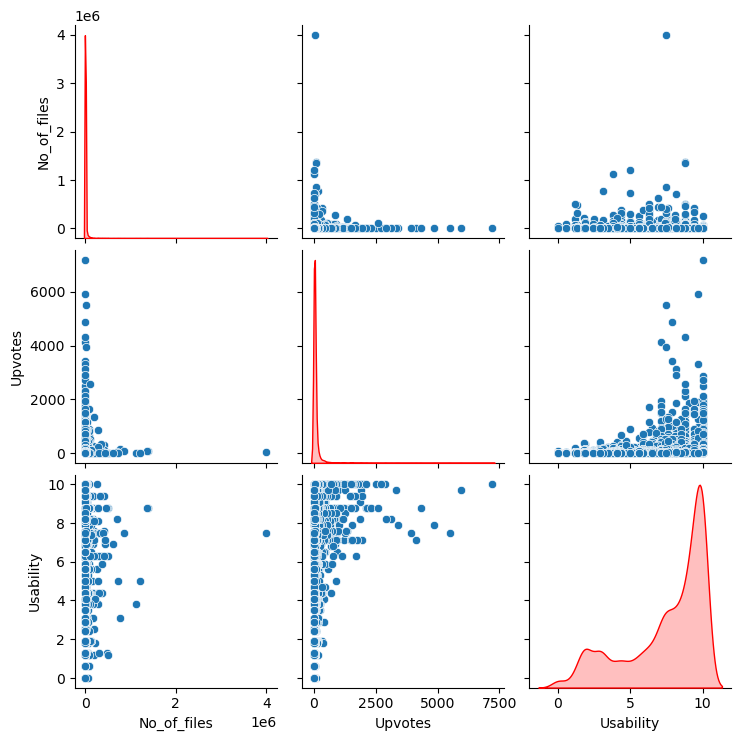

In [27]:
# Evaluate for potential outliers
# using sns.pairplot

sns.pairplot(df_data, diag_kind = 'kde', diag_kws={'color':'red'}, dropna = True)
plt.show()

# Notes:
# This dataset has only three numerical features (no_of_files, upvote, and usability). 
# 1. Upvotes shows one with very high number of upvote score of over 25,000 while all in the 
#    cluster are well below 10,000 upvotes
# 2. No_of_files has one (showing multiple files for the dataset) way out of the cluster 
#    having high score with both usability and upvote
# 3. Not much as an outlier but usability seems to rise sharply right about when it reaches 
#    a score of 7.

In [28]:
import os
# Saving the cleaned dataset to a csv file
df_data.to_csv ('./output_data/df_data_cleaned.csv', 
                 encoding = 'utf-8-sig', 
                 index = False, header=True)

os.listdir('./output_data')

['.DS_Store', 'summary_stats_desc.csv', 'df_data_cleaned.csv']